該 import 的東西都差不多 import 完了，所以可以直接複製這個檔案作為開頭 section，直接開始後面的分析。

In [1]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## 資料處理

In [20]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
0,4234,Scream 3,40000000,"['Horror', 'Mystery']",en,"['Craven-Maddalena Films', 'Dimension Films', ...",2000-02-03,NaN,161834276,116,...,R,37.0,驚聲尖叫3：終結篇,Scream Collection,0,1,1,0,2000,2
1,1907,The Beach,40000000,"['Drama', 'Adventure', 'Romance', 'Thriller']",en,['Figment Films'],2000-02-03,NaN,144056873,119,...,R,57.0,海灘,NaN,0,0,1,0,2000,2
2,15655,The Tigger Movie,30000000,"['Family', 'Animation', 'Comedy']",en,"['Disney Television Animation', 'DisneyToon St...",2000-02-11,NaN,45554533,77,...,G,62.0,跳跳虎歷險記,NaN,1,0,1,0,2000,2
3,14181,Boiler Room,7000000,"['Crime', 'Drama', 'Thriller']",en,['New Line Cinema'],2000-02-18,NaN,28780255,118,...,R,78.0,搶錢大作戰,NaN,0,0,1,0,2000,2
4,2069,The Whole Nine Yards,41300000,"['Comedy', 'Crime']",en,"['Franchise Pictures', 'Morgan Creek Productio...",2000-02-18,NaN,106371651,98,...,R,64.0,殺手不眨眼,The Whole Nine/Ten Yards Collection,0,1,1,0,2000,2


,id,title,budget,genres,original_language,production_companies,release_date,TW_release_date,revenue,runtime,...,rating,rotten_aud_score,zh_title,belongs_to_collection,has_homepage,has_collection,pre_covid,post_covid,release_year,release_month
3167,460465,Mortal Kombat,20000000,"['Action', 'Fantasy', 'Adventure']",en,"['Atomic Monster', 'Broken Road Productions', ...",2021-04-07,NaN,76706000,110,...,R,86.0,真人快打,NaN,1,0,0,1,2021,4
3168,637649,Wrath of Man,40000000,"['Action', 'Crime']",en,"['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...",2021-04-22,2021-04-29T00:00:00.000Z,80648577,119,...,R,91.0,玩命鈔劫,NaN,1,0,0,1,2021,4
3169,520663,The Woman in the Window,4000000,"['Crime', 'Mystery', 'Thriller']",en,"['Fox 2000 Pictures', 'Scott Rudin Productions...",2021-05-14,NaN,0,102,...,R,36.0,窺探,NaN,1,0,0,1,2021,5
3170,503736,Army of the Dead,90000000,"['Action', 'Horror', 'Thriller']",en,['The Stone Quarry'],2021-05-14,NaN,780000,148,...,NaN,NaN,活屍大軍,Army of the Dead Collection,1,1,0,1,2021,5
3171,337404,Cruella,200000000,"['Comedy', 'Crime']",en,['Walt Disney Pictures'],2021-05-26,NaN,46586903,134,...,PG-13,97.0,時尚惡女：庫伊拉,Cruella Collection,1,1,0,1,2021,5


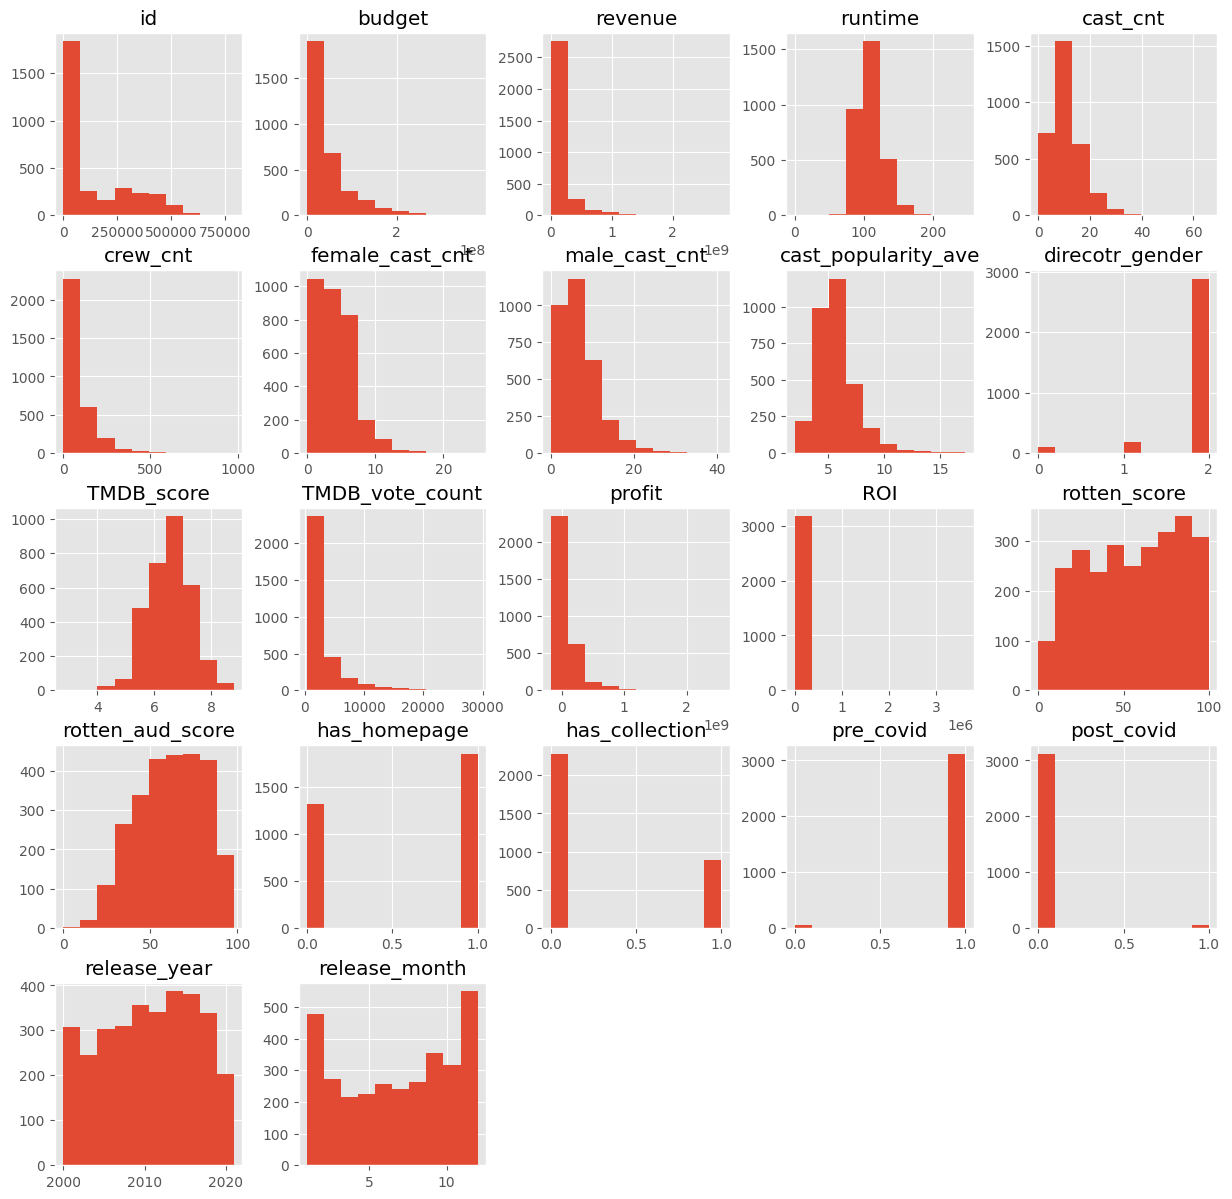

In [21]:
movie_df.hist(figsize=(15, 15))
plt.show()

可以看出裡面有需多 outliers，這些 data points 很可能影響到整體結果，所以我們將不考慮這些電影的計算。

在這邊，我們也可以看到 "revenue"、"budget"、"ROI" 這三個重點項目都不是常態分佈，要做分析的話會有點困難。這時候，我們可以採用 `np.log1p()` 來做 data transformation。如要要做預測的話，則是用 `np.exp1p()` 來還原。這部分，會在去除玩異質之後統一處理。

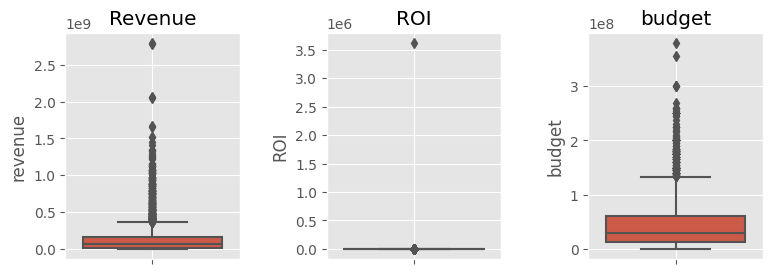

In [22]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>你知道嗎？</b> 票房最高的電影是 2019 年上映的復仇者聯盟：終局之戰。</div>

In [37]:
movie_df.sort_values(by='revenue', ascending=False).head(20)[['release_date', 'zh_title', 'revenue', 'director']]

,release_date,zh_title,revenue,director
3005,2019-04-24,復仇者聯盟：終局之戰,2797800564,Anthony Russo
1339,2009-12-10,阿凡達,2787965087,James Cameron
2418,2015-12-15,STAR WARS：原力覺醒,2068223624,J.J. Abrams
2850,2018-04-25,復仇者聯盟3：無限之戰,2046239637,Anthony Russo
2315,2015-06-06,侏羅紀世界,1671713208,Colin Trevorrow
3032,2019-07-12,獅子王,1656943394,Jon Favreau
1756,2012-04-25,復仇者聯盟,1518815515,Joss Whedon
2287,2015-04-01,玩命關頭7,1515047671,James Wan
3086,2019-11-20,冰雪奇緣2,1450026933,Chris Buck
2298,2015-04-22,復仇者聯盟2：奧創紀元,1405403694,Joss Whedon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

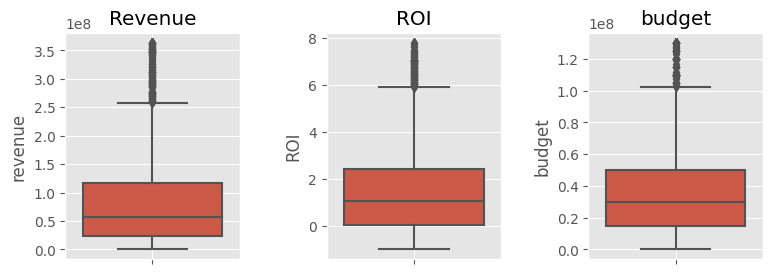

In [24]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0] # [:20]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0] # [:5]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0] # [:5]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

In [ ]:
u_movie_df.sort_values(by='revenue', ascending=False).head(5)[['release_date', 'title', 'zh_title', 'revenue', 'director', 'release_month']]

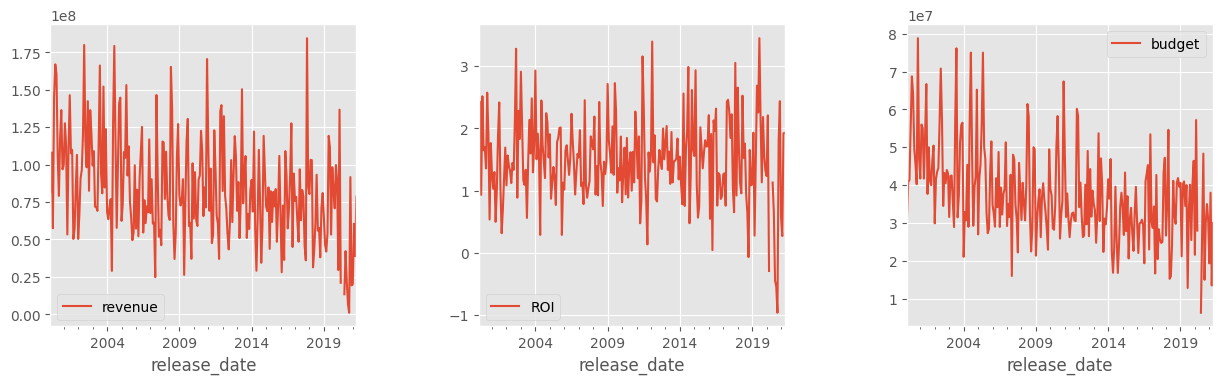

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
u_movie_df.set_index('release_date').resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
u_movie_df.set_index('release_date').resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
u_movie_df.set_index('release_date').resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

雖然這明顯地去除掉許多 outliers，但我們可以發現一件事：**去掉 outliers 後，可以看到以前的電影表現比較平均一點，越後期的電影看起來只有少數賣座電影在撐場而已**，最高的是博物館驚魂夜3，其次是玩命關頭系列的玩命關頭4。前十名的電影裡面，幾乎都是一些老牌電影（2012 前上映）。整體收入平均也有明顯的下降趨勢。當然，這對在 2020 和 2021 之間上映的電影來說非常不公平。

所以我們最後只去除前 20 個 outliers 以防止這種一年不如一年的情況發生。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2788 non-null   int64         
 1   title                  2788 non-null   object        
 2   budget                 2788 non-null   int64         
 3   genres                 2788 non-null   object        
 4   original_language      2788 non-null   object        
 5   production_companies   2788 non-null   object        
 6   release_date           2788 non-null   datetime64[ns]
 7   TW_release_date        762 non-null    object        
 8   revenue                2788 non-null   int64         
 9   runtime                2788 non-null   int64         
 10  cast                   2788 non-null   object        
 11  cast_cnt               2788 non-null   int64         
 12  crew_cnt               2788 non-null   int64         
 13  fem

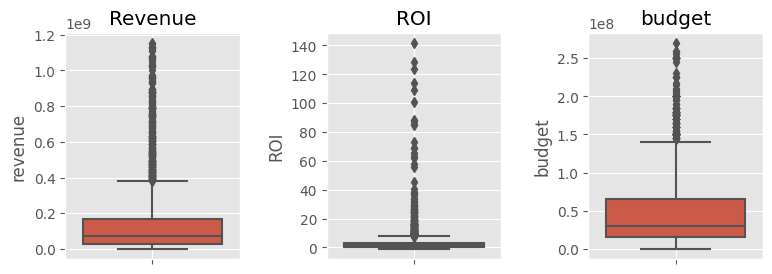

In [35]:
rev_outlier = sorted(mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0], reverse=True)[:20]
roi_outlier = sorted(mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0], reverse=True)[:5]
budget_outlier = sorted(mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0], reverse=True)[:5]
                        
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)

plt.show()

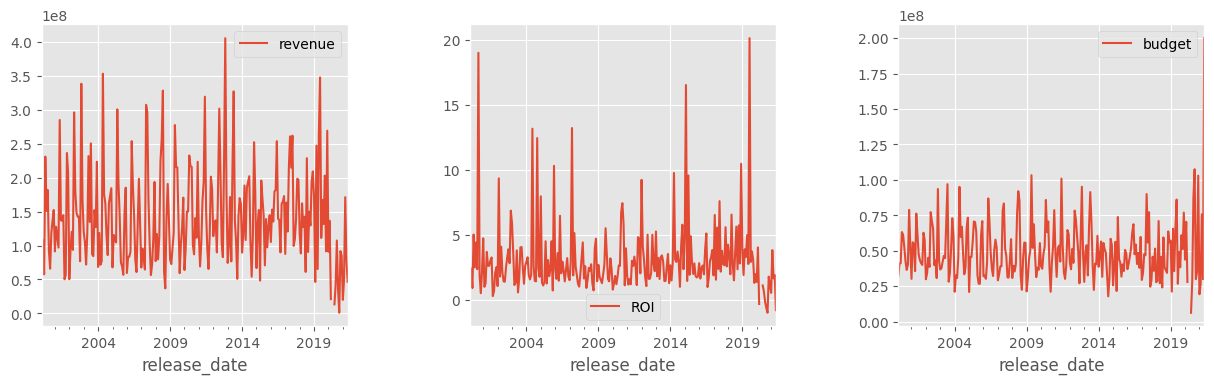

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
u_movie_df.set_index('release_date').resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
u_movie_df.set_index('release_date').resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
u_movie_df.set_index('release_date').resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

我們可以看到，用 20-5-5 去除掉 outliers 後，結果不僅較為合理，也幫我們去除掉了非常大、不合理的數字。因此我們便用剩下的 2788 筆資料進行更近一步的分析。另外，在這邊也要注意到，不是所有的 column 都是 2788 筆資料，有些 data 是有少的。所以在做分析時要格外小心。

In [38]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

# 年份以及月份
u_movie_df['release_month'] = u_movie_df['release_date'].apply(lambda x: x.month)
u_movie_df['release_year'] = u_movie_df['release_date'].apply(lambda x: x.year)

In [39]:
u_movie_df.sort_values(by='revenue', ascending=False).head(20)[['release_date', 'title', 'zh_title', 'revenue', 'director', 'release_month']]

,release_date,title,zh_title,revenue,director,release_month
2220,2016-04-27,Captain America: Civil War,美國隊長3：英雄內戰,1153296293,Anthony Russo,4
2618,2018-12-07,Aquaman,水行俠,1148461807,James Wan,12
2680,2019-06-28,Spider-Man: Far From Home,蜘蛛人：離家日,1131927996,Jon Watts,6
2646,2019-03-06,Captain Marvel,驚奇隊長,1128276090,Ryan Fleck,3
1447,2011-06-28,Transformers: Dark of the Moon,變形金剛3：黑月降臨,1123794079,Michael Bay,6
384,2003-12-01,The Lord of the Rings: The Return of the King,魔戒三部曲：王者再臨,1118888979,Peter Jackson,12
1664,2012-10-25,Skyfall,007：空降危機,1108561013,Sam Mendes,10
1616,2012-07-16,The Dark Knight Rises,黑暗騎士：黎明昇起,1081041287,Christopher Nolan,7
2705,2019-10-02,Joker,小丑,1074251311,Todd Phillips,10
2734,2019-12-18,Star Wars: The Rise of Skywalker,STAR WARS：天行者的崛起,1074144248,J.J. Abrams,12


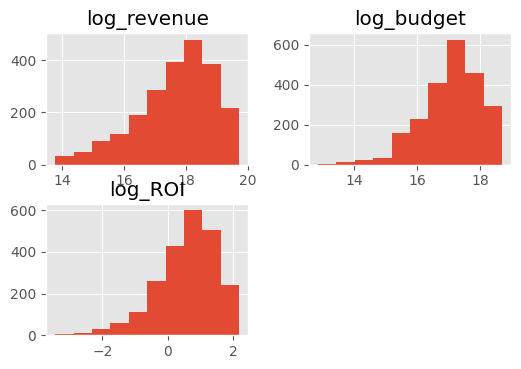

In [78]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

## Data Analysis